# Case Study(Heart Disease)
This database contains 14 attributes . In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

## Problem Statement:
We will try to predict whether a person is suffering from heart disease or not. Output feature is num which contains values from 0 to 4


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
cleveland_df=pd.read_csv("/Users/bhupendrakumar/Documents/ML Data Scientist Projects/Heart-Disease-Prediction-master/cleveland.csv",header=None)

# EDA(Exploratory Data Analysis)

In [3]:
cleveland_df.columns=['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'num']

In [4]:
cleveland_df.shape

(303, 14)

In [5]:
cleveland_df.head()
# In sex column 0 represents female and 1 male

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [6]:
cleveland_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
num           int64
dtype: object

In [7]:
cleveland_df.isnull().sum()
# ca and thal contains null values.

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [18]:
cleveland_df.num.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [8]:
cleveland_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


Observtaion:

i. trestbps, chol etc contains outliers. As 75%le is far less than 100%le.

ii. fbs seems to have few 1 rest all values are zeros. It might not be of much value. Need further exploration.

In [9]:
cleveland_df.thal.value_counts()
# thal represents thalasemia, where 3 is normal, 6 is fixed and 7 is reversible.

3.0    166
7.0    117
6.0     18
Name: thal, dtype: int64

In [10]:
cleveland_df.ca.value_counts()
# ca represents, number of majoured vessels.
# Moth variables containing null are categorical values, we will use mode to impute null values in both the features.

0.0    176
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

In [11]:
# Imputing Null values
cleveland_df['ca'].fillna(cleveland_df.ca.mode()[0],inplace=True)
cleveland_df['thal'].fillna(cleveland_df.thal.mode()[0], inplace=True)

In [13]:
cleveland_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [19]:
cleveland_df.num=cleveland_df.num.map({0:0,1:1,2:1,3:1,4:1})

In [21]:
cleveland_df.num.value_counts()

0    164
1    139
Name: num, dtype: int64

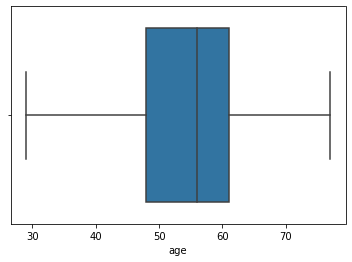

In [23]:
# boxplot
sns.boxplot(cleveland_df['age'])

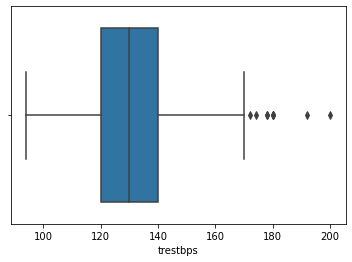

In [24]:
#Outliers are present in trestbps dataset
sns.boxplot(cleveland_df['trestbps'])

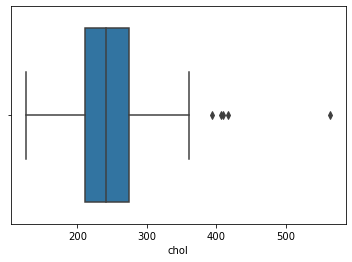

In [25]:
sns.boxplot(cleveland_df['chol'])

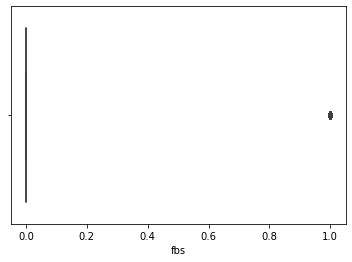

In [26]:
sns.boxplot(cleveland_df['fbs'])

In [27]:
# We won't remove Outliers as they might be of use and data in hand is very less. 
# I have decided to work with data available.

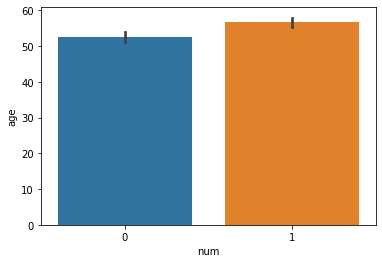

In [29]:
# Barplot
sns.barplot(x='num',y='age',data=cleveland_df)
# Above 52 age are more likely to have heart disease 

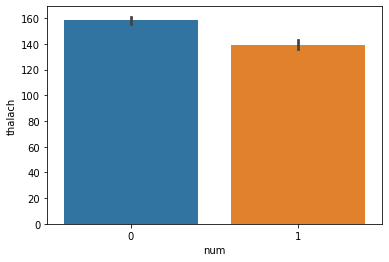

In [38]:
sns.barplot(x='num',y='thalach',data=cleveland_df)


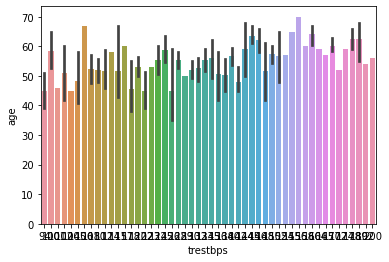

In [30]:
sns.barplot(x='trestbps',y='age',data=cleveland_df)

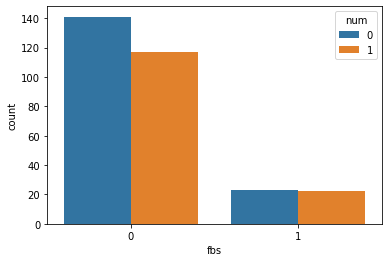

In [31]:
sns.countplot(x='fbs',hue='num',data=cleveland_df)
# If it is 1 that means fasting blood sugar level is >120mg/dl. Chances of having Heart disease is 50%.
# Else 0, Chances of not having Heart disease is higher than having.

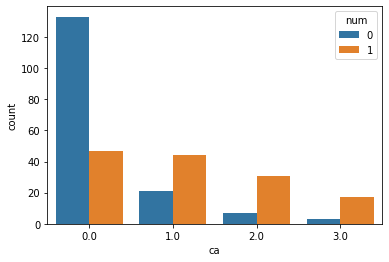

In [32]:
sns.countplot(x='ca',hue='num',data=cleveland_df)

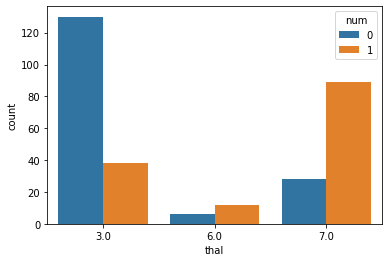

In [33]:
sns.countplot(x='thal',hue='num',data=cleveland_df)

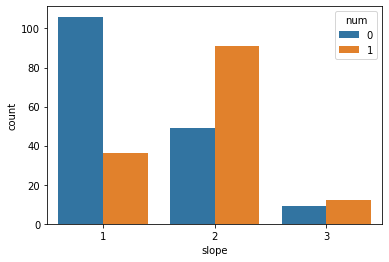

In [34]:
sns.countplot(x='slope',hue='num',data=cleveland_df)

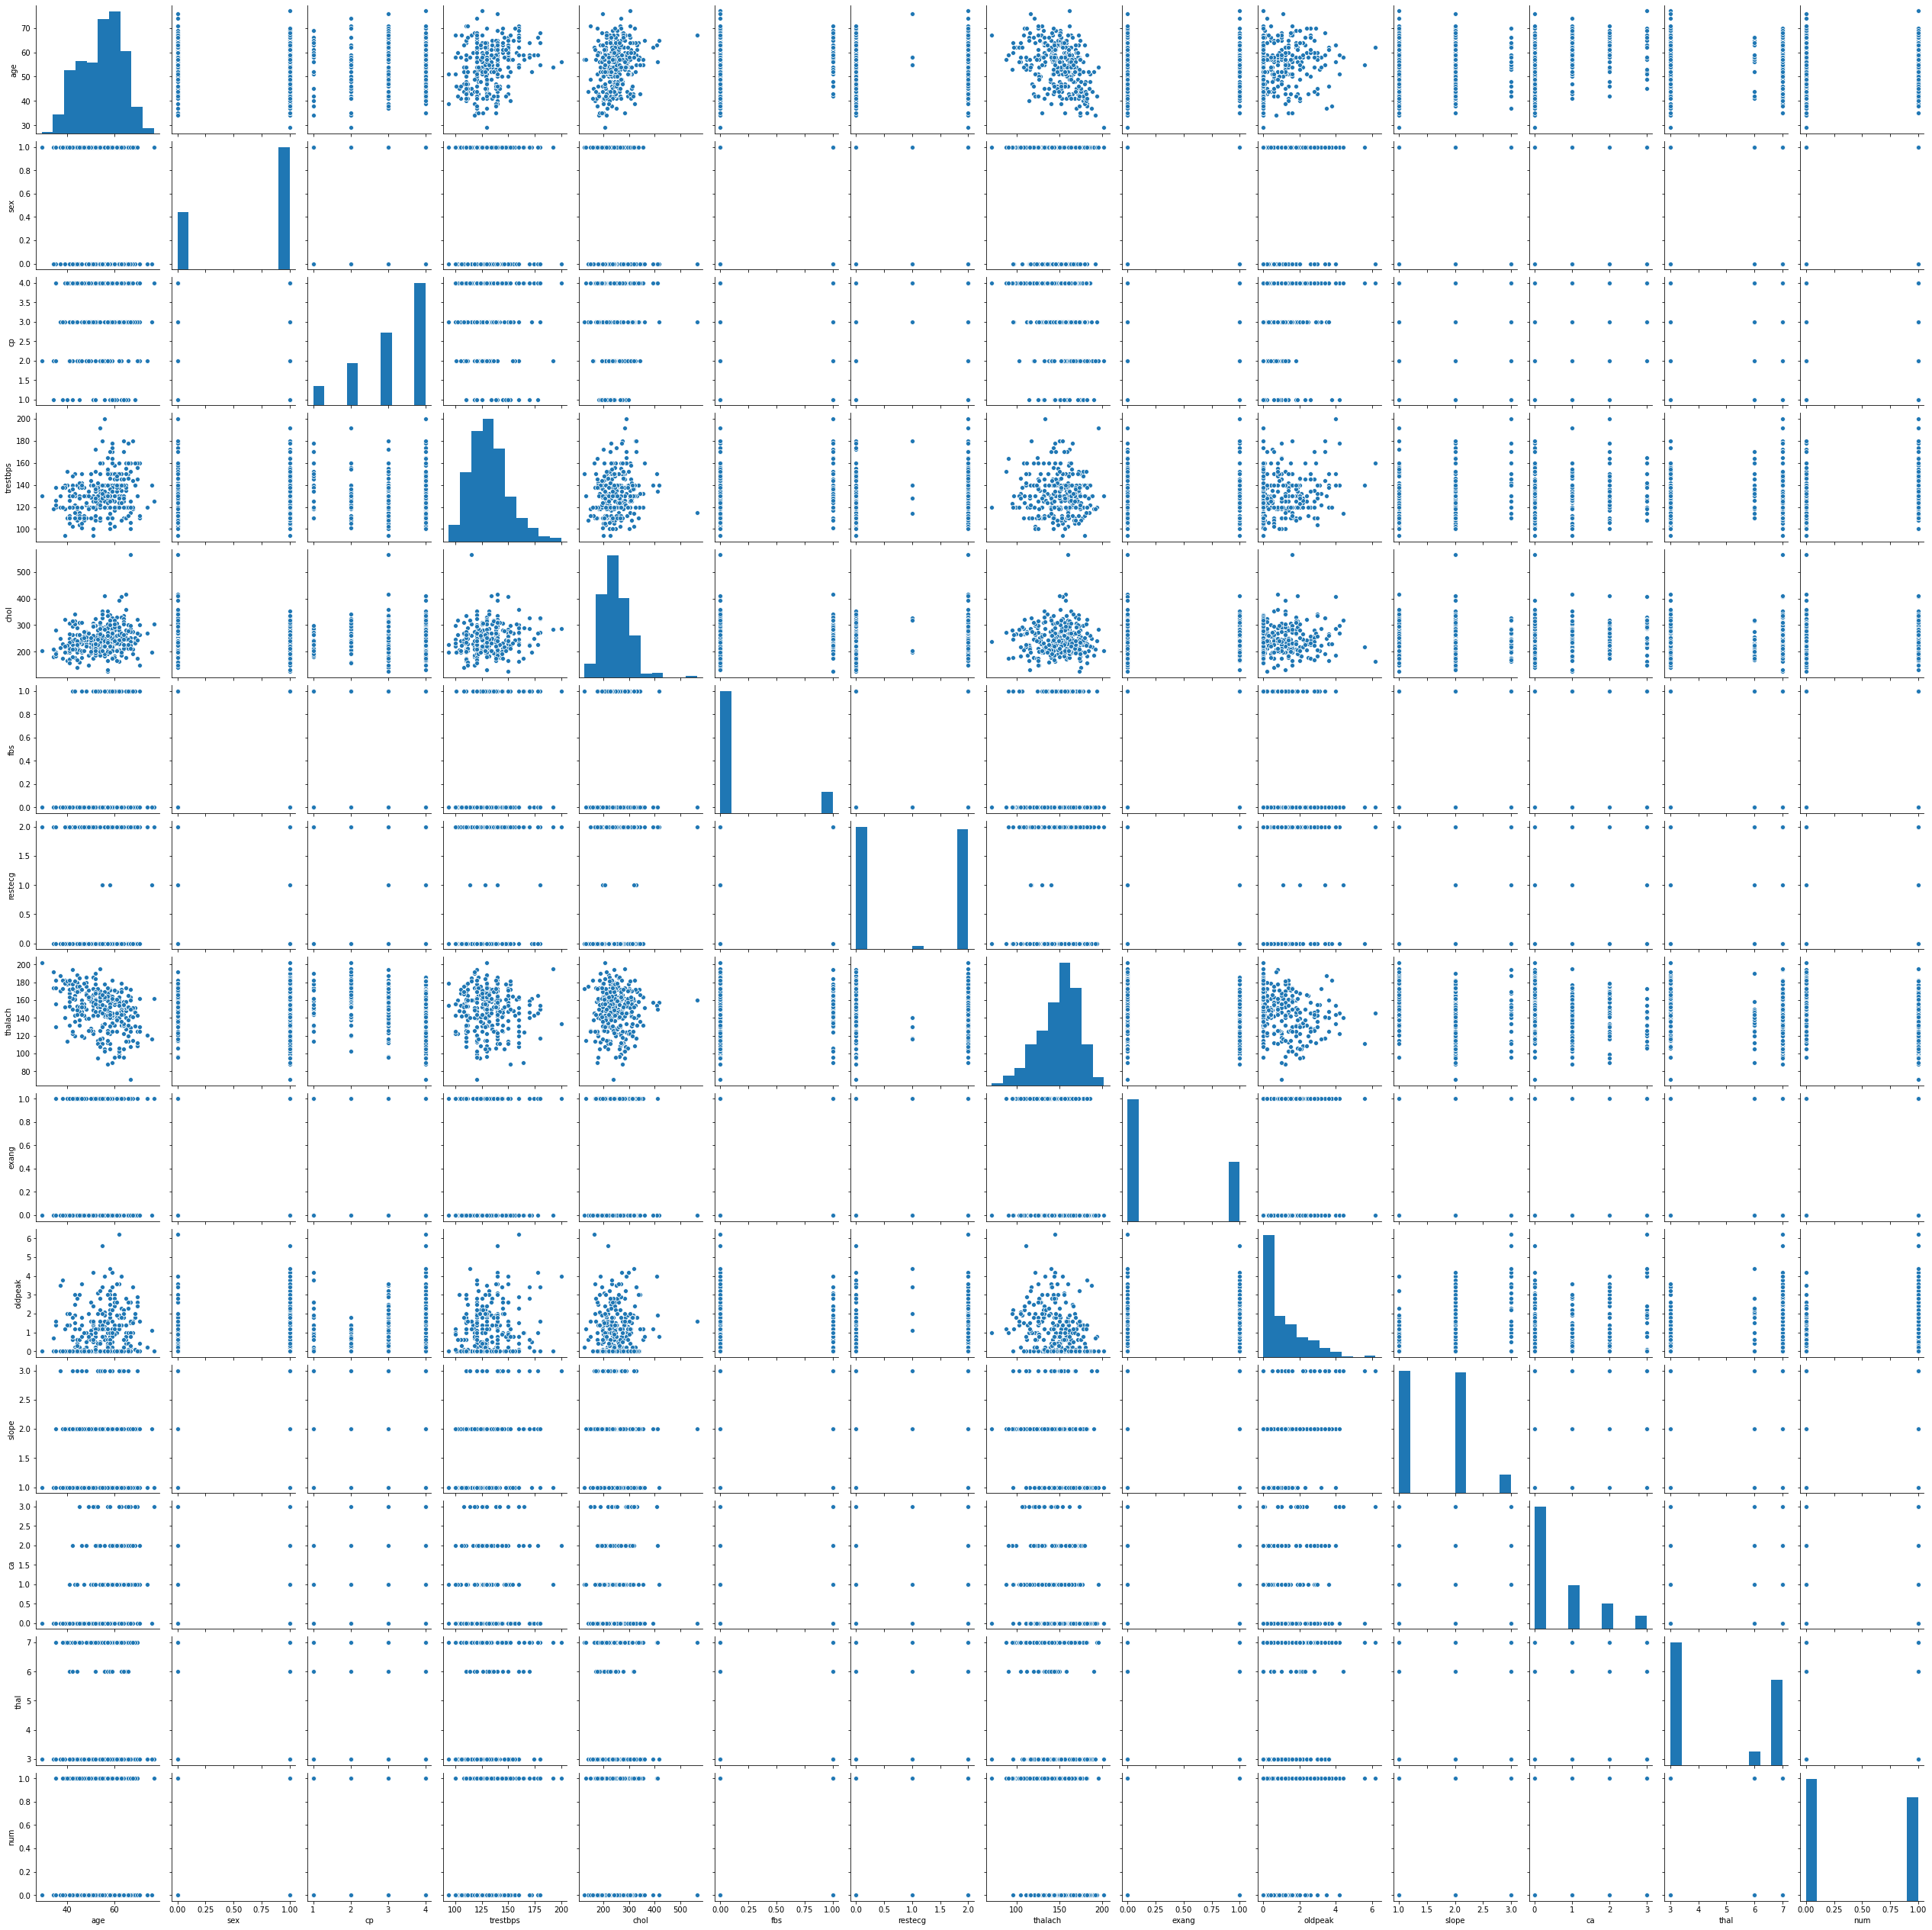

In [39]:
# pairplot
sns.pairplot(cleveland_df)

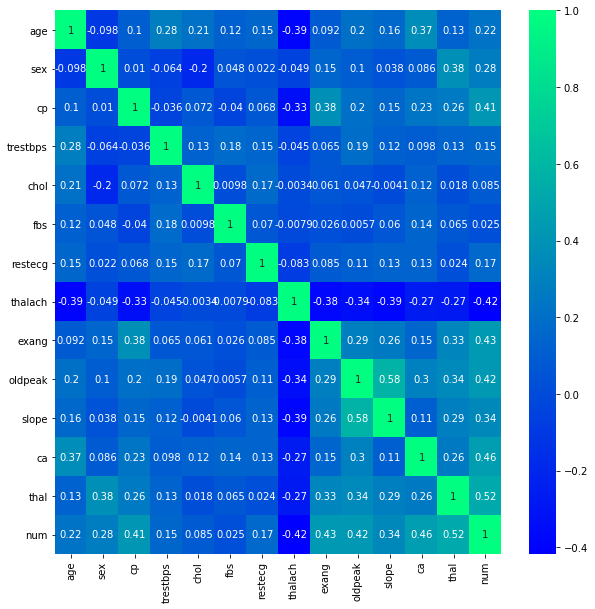

In [37]:
# correlation plot
corr_mat=cleveland_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat,annot=True,cmap='winter')

# Model Selection

In [53]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

### Normalisation

In [41]:
Y=cleveland_df['num']
X=cleveland_df.drop('num',axis=1)

In [43]:
print(X.shape,Y.shape)

(303, 13) (303,)


In [44]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [45]:
cols2norm=['age','fbs','chol','thalach','trestbps','oldpeak']

for col in cols2norm:
    X[col]=(X[col]-min(X[col]))/(max(X[col])-min(X[col]))

In [46]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1,1,0.481132,0.244292,1.0,2,0.603053,0,0.370968,3,0.0,6.0
1,0.791667,1,4,0.622642,0.365297,0.0,2,0.282443,1,0.241935,2,3.0,3.0
2,0.791667,1,4,0.245283,0.235160,0.0,2,0.442748,1,0.419355,2,2.0,7.0
3,0.166667,1,3,0.339623,0.283105,0.0,0,0.885496,0,0.564516,3,0.0,3.0
4,0.250000,0,2,0.339623,0.178082,0.0,2,0.770992,0,0.225806,1,0.0,3.0


In [47]:
max_accScore=0
active_as=0
iBest_rs=0
# cm: classification model
cm=DecisionTreeClassifier()
for iActive_rs in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs,test_size=0.2)
    cm.fit(x_train,y_train)
    pred=cm.predict(x_test)
    active_as=accuracy_score(pred,y_test)
    if active_as>max_accScore:
        max_accScore=active_as
        iBest_rs=iActive_rs
print("Best(max) accuracy score is {} for random state {}.".format(max_accScore,iBest_rs))
# For random state 60 we are getting accuracy of 85.

Best(max) accuracy score is 0.8524590163934426 for random state 60.


In [48]:
max_accScore=0
active_as=0
iBest_rs=0
# cm: classification model
cm=KNeighborsClassifier()
for iActive_rs in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs,test_size=0.2)
    cm.fit(x_train,y_train)
    pred=cm.predict(x_test)
    active_as=accuracy_score(pred,y_test)
    if active_as>max_accScore:
        max_accScore=active_as
        iBest_rs=iActive_rs
print("Best(max) accuracy score is {} for random state {}.".format(max_accScore,iBest_rs))
# For random state 84 we are getting accuracy of 92% approximately.

Best(max) accuracy score is 0.9180327868852459 for random state 84.


In [49]:
max_accScore=0
active_as=0
iBest_rs=0
# cm: classification model
cm=LogisticRegression()
for iActive_rs in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs,test_size=0.2)
    cm.fit(x_train,y_train)
    pred=cm.predict(x_test)
    active_as=accuracy_score(pred,y_test)
    if active_as>max_accScore:
        max_accScore=active_as
        iBest_rs=iActive_rs
print("Best(max) accuracy score is {} for random state {}.".format(max_accScore,iBest_rs))
# For random state 73 we are getting accuracy of 92% approximately.

Best(max) accuracy score is 0.9180327868852459 for random state 73.


In [50]:
max_accScore=0
active_as=0
iBest_rs=0
# cm: classification model
cm=AdaBoostClassifier()
for iActive_rs in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs,test_size=0.2)
    cm.fit(x_train,y_train)
    pred=cm.predict(x_test)
    active_as=accuracy_score(pred,y_test)
    if active_as>max_accScore:
        max_accScore=active_as
        iBest_rs=iActive_rs
print("Best(max) accuracy score is {} for random state {}.".format(max_accScore,iBest_rs))
# For random state 58 we are getting accuracy of 89% approximately.

Best(max) accuracy score is 0.8852459016393442 for random state 58.


In [51]:
max_accScore=0
active_as=0
iBest_rs=0
# cm: classification model
cm=GradientBoostingClassifier()
for iActive_rs in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs,test_size=0.2)
    cm.fit(x_train,y_train)
    pred=cm.predict(x_test)
    active_as=accuracy_score(pred,y_test)
    if active_as>max_accScore:
        max_accScore=active_as
        iBest_rs=iActive_rs
print("Best(max) accuracy score is {} for random state {}.".format(max_accScore,iBest_rs))
# For random state 100 we are getting accuracy of 90% approximately.

Best(max) accuracy score is 0.9016393442622951 for random state 100.


In [54]:
max_accScore=0
active_as=0
iBest_rs=0
# cm: classification model
cm=SVC(kernel='rbf')
for iActive_rs in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=iActive_rs,test_size=0.2)
    cm.fit(x_train,y_train)
    pred=cm.predict(x_test)
    active_as=accuracy_score(pred,y_test)
    if active_as>max_accScore:
        max_accScore=active_as
        iBest_rs=iActive_rs
print("Best(max) accuracy score is {} for random state {}.".format(max_accScore,iBest_rs))
# For random state 98 we are getting accuracy of 94% approximately.

Best(max) accuracy score is 0.9344262295081968 for random state 98.


In [55]:
# SVM is giving us best accuracy of approx 94% amongst all the trained models. 
# We will release SVM model.

In [57]:
svm=SVC(kernel='rbf')
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=98,test_size=0.2)
svm.fit(x_train,y_train)
pred=svm.predict(x_test)
print("Accuracy score is {}".format(accuracy_score(pred,y_test)))
print(confusion_matrix(pred,y_test))
print(classification_report(pred,y_test))
# f1 score is good, let's check, whether we are over/under fitting the model.

Accuracy score is 0.9344262295081968
[[38  2]
 [ 2 19]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        40
           1       0.90      0.90      0.90        21

    accuracy                           0.93        61
   macro avg       0.93      0.93      0.93        61
weighted avg       0.93      0.93      0.93        61



In [58]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(svm,X,Y,cv=30,scoring='accuracy').mean()
print("std: {}".format(score.std()))
print("cross_val_score: {}".format(score*100))
# Implies, we are not over/under fitting the model. cross_val_score is good.

std: 0.0
cross_val_score: 83.12121212121212


In [61]:
# Saving the model using joblib
import joblib
# Saving model as pickle in a file
joblib.dump(svm,'svm_HeartDisease.pkl')

['svm_HeartDisease.pkl']